# DSC 630 Predictive Analytics

## DSC630  Predictive Analytics
___Term Project: Global Student Migration___

___Date: 21 September 2025___

___Name: Suriyamurthy, Subash Karthick___

___Version: Milestone 2 - September 21___

___Version: Milestone 4 - October 09___


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import warnings
warnings.filterwarnings('ignore')

International student migration is crucial in shaping global education systems, national economies, and cultural exchanges. The United States, in particular, is one of the largest host countries for international students. This migration is influenced by global economic conditions, visa regulations, political climates, and academic opportunities. Understanding and forecasting these migration trends is beneficial for universities, policymakers, and international organizations, as these trends impact tuition revenues, workforce development, and international collaboration.

This project will utilize the Global Student Migration dataset, which tracks the movement of students from various countries to host destinations, including the United States, over multiple years. By applying predictive analytics, the project aims to identify patterns and forecast future migration flows, focusing on the U.S. as a case study while considering the global context.

The description also includes a discussion on policy implications, including immigration reforms, post-study work rights, and the balance between national interests and global talent acquisition. Issues like brain drain in developing countries versus brain gain in destination countries are examined to understand the socio-economic impact of student migration


## Dataset preparation

In [ ]:
#check versions of packages
print('pandas version:', pd.__version__)
print('numpy version:', np.__version__)
print('scikit-learn version:', sklearn.__version__)

pandas version: 2.2.2
numpy version: 2.0.2
scikit-learn version: 1.6.1


In [2]:
student_df = pd.read_csv('global_student_migration.csv')

## Exploration Data Analysis

In [ ]:
student_df.head()

,student_id,origin_country,destination_country,destination_city,university_name,course_name,field_of_study,year_of_enrollment,scholarship_received,enrollment_reason,graduation_year,placement_status,placement_country,placement_company,starting_salary_usd,gpa_or_score,visa_status,post_graduation_visa,language_proficiency_test,test_score
0,S00001,Finland,Russia,Moscow,Lomonosov Moscow State University,Computer Science,Engineering,2021,No,Higher Ranking,2024,Placed,Russia,Microsoft,36416,3.92,Tier 4,Work Permit,TOEFL,7.8
1,S00002,UK,Germany,Aachen,RWTH Aachen,Civil Engineering,Law,2023,Yes,Job Opportunities,2024,Placed,Germany,Google,32956,2.60,Study Permit,OPT,PTE,7.9
2,S00003,Ireland,Canada,Vancouver,University of British Columbia,Law,Arts,2019,No,Scholarship,2020,Not Placed,NaN,NaN,0,2.72,F1,Blue Card,NaN,0.0
3,S00004,UAE,UK,Birmingham,University of Birmingham,Data Science,Social Sciences,2021,Yes,Quality of Life,2023,Placed,UK,Apple,50892,3.71,Schengen Student Visa,PSW,NaN,0.0
4,S00005,South Africa,Germany,Stuttgart,University of Stuttgart,Business Administration,Law,2020,Yes,Political Stability,2021,Placed,Germany,IBM,54790,2.96,Schengen Student Visa,OPT,PTE,8.2


In [ ]:
student_df.shape

(5000, 20)

In [ ]:
student_df.columns.to_list()

['student_id',
 'origin_country',
 'destination_country',
 'destination_city',
 'university_name',
 'course_name',
 'field_of_study',
 'year_of_enrollment',
 'scholarship_received',
 'enrollment_reason',
 'graduation_year',
 'placement_status',
 'placement_country',
 'placement_company',
 'starting_salary_usd',
 'gpa_or_score',
 'visa_status',
 'post_graduation_visa',
 'language_proficiency_test',
 'test_score']

,0
student_id,object
origin_country,object
destination_country,object
destination_city,object
university_name,object
course_name,object
field_of_study,object
year_of_enrollment,int64
scholarship_received,object
enrollment_reason,object


In [ ]:
student_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   student_id                 5000 non-null   object 
 1   origin_country             5000 non-null   object 
 2   destination_country        5000 non-null   object 
 3   destination_city           5000 non-null   object 
 4   university_name            5000 non-null   object 
 5   course_name                5000 non-null   object 
 6   field_of_study             5000 non-null   object 
 7   year_of_enrollment         5000 non-null   int64  
 8   scholarship_received       5000 non-null   object 
 9   enrollment_reason          5000 non-null   object 
 10  graduation_year            5000 non-null   int64  
 11  placement_status           5000 non-null   object 
 12  placement_country          2509 non-null   object 
 13  placement_company          2509 non-null   objec

In [ ]:
student_df.describe()

,year_of_enrollment,graduation_year,starting_salary_usd,gpa_or_score,test_score
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,2021.011000,2023.017800,44552.531000,3.246820,5.632200
std,1.420733,1.651432,50719.190623,0.430659,2.973838
min,2019.000000,2020.000000,0.000000,2.500000,0.000000
25%,2020.000000,2022.000000,0.000000,2.877500,5.300000
50%,2021.000000,2023.000000,30516.500000,3.240000,6.500000
75%,2022.000000,2024.000000,87838.500000,3.610000,7.800000
max,2023.000000,2026.000000,149932.000000,4.000000,9.000000


### Observation from Exploration Data Analytics:
Data Structure & Quality:

* Shape: The dataset consists of 5,000 rows and 20 columns, providing a rich resource for multi-dimensional analysis.

* Data Types: Most of the columns are of the object type, even those intended for categorical and numeric-like fields (such as ‘scholarship_received’ and ‘visa_status’). Type conversion is necessary for accurate analysis.

* Missing Values: The ‘placement_company’ and ‘placement_country’ columns contain approximately 50% missing values, which may introduce bias in placement analysis. Additionally, the ‘language_proficiency_test’ column has around 20% missing values; it's important to check if the missingness correlates with the origin or destination countries.

Key Numeric Columns:

* Enrollment and Graduation Years:
  * Enrollment Year Range: 2019–2023

  * Graduation Year Range: 2020–2026

 The median enrollment year is 2021, indicating a recent trend in migration.

* Starting Salary:
  * The salary data is highly skewed, ranging from $0 to $149,932. The median starting salary is $30,516, suggesting that a log transformation may be beneficial for visualization purposes.

* GPA and Test Score:
  * GPA ranges from 2.5 to 4.0, with a mean of approximately 3.25, suggesting a likely normal distribution.

  * Test scores range from 5.3 to 9; it’s important to examine the correlation between test scores and destination countries.

Categorical Columns for Analysis:

* Destination Country and City: These columns highlight the top migration destinations, which have already been visualized.

* Field of Study and Course Name: This data will help identify popular fields and their connection to placement success.

* Scholarship Received: The influence of scholarships on GPA and placement outcomes should be explored.

* Visa Status and Post-Graduation Visa: Analyzing patterns based on destination countries will provide insights into the impact of visa status.


## Data Visualization

## Top 10 Destination Countries for students:

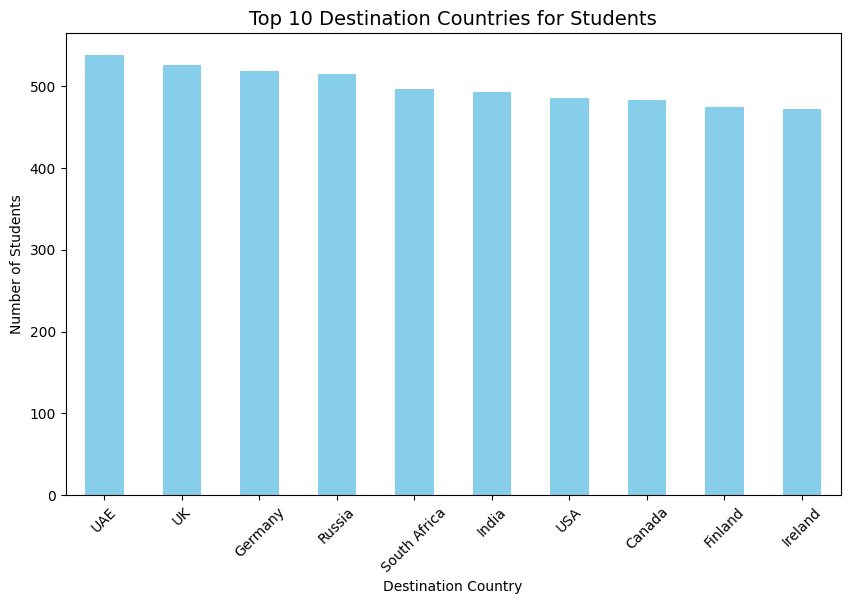

In [ ]:
# --- 1. Top 10 Destination Countries ---
plt.figure(figsize=(10,6))
student_df['destination_country'].value_counts().head(10).plot(kind='bar', color='skyblue')
plt.title("Top 10 Destination Countries for Students", fontsize=14)
plt.xlabel("Destination Country")
plt.ylabel("Number of Students")
plt.xticks(rotation=45)
plt.show()


### Observation:
* UAE leads as the top destination with the highest number of students (slightly above 540), indicating strong migration preference compared to other countries.
* UK and Germany follow closely, both above 520 students, showing Europe remains a popular choice for student migration.
* Ireland and Finland rank lowest among the top 10, with student numbers just under 480, suggesting relatively lower attractiveness compared to UAE and UK.

## Scholarship Distribution by Destination Country:

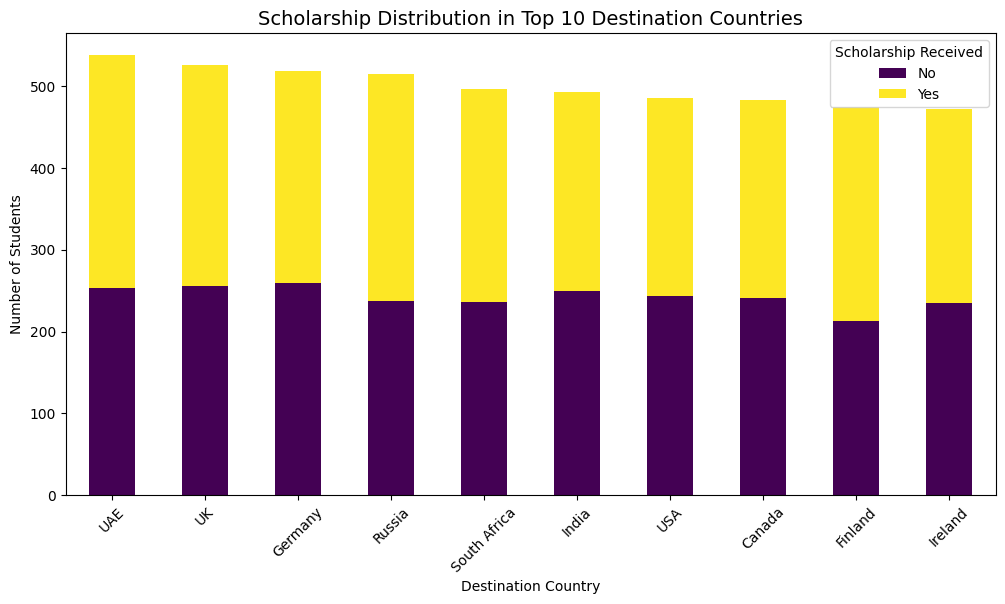

In [ ]:
# --- 2. Scholarship Distribution by Destination Country ---
scholarship_counts = (
    student_df.groupby(['destination_country', 'scholarship_received'])['student_id']
      .count()
      .unstack(fill_value=0)
)

# Sort by total students per country
scholarship_counts['total'] = scholarship_counts.sum(axis=1)
scholarship_counts = scholarship_counts.sort_values(by='total', ascending=False).head(10)

# Drop helper column before plotting
scholarship_counts.drop(columns='total').plot(
    kind='bar', stacked=True, figsize=(12,6), colormap='viridis'
)

plt.title("Scholarship Distribution in Top 10 Destination Countries", fontsize=14)
plt.xlabel("Destination Country")
plt.ylabel("Number of Students")
plt.xticks(rotation=45)
plt.legend(title="Scholarship Received")
plt.show()


### Observation:
* In all top 10 destination countries, the yellow bars (scholarship received) are larger than the purple bars (no scholarship), indicating that a majority of students receive scholarships.
* UAE, UK, and Germany lead in scholarship numbers: These countries have the highest overall student counts and also the largest scholarship segments, suggesting strong financial aid availability or attraction for scholarship seekers
* Finland and Ireland show relatively lower scholarship proportions: While total student numbers are lower for these countries, the gap between scholarship and non-scholarship students is narrower, indicating fewer scholarships compared to top destinations like UAE or UK

## Placement Status by Field of Study

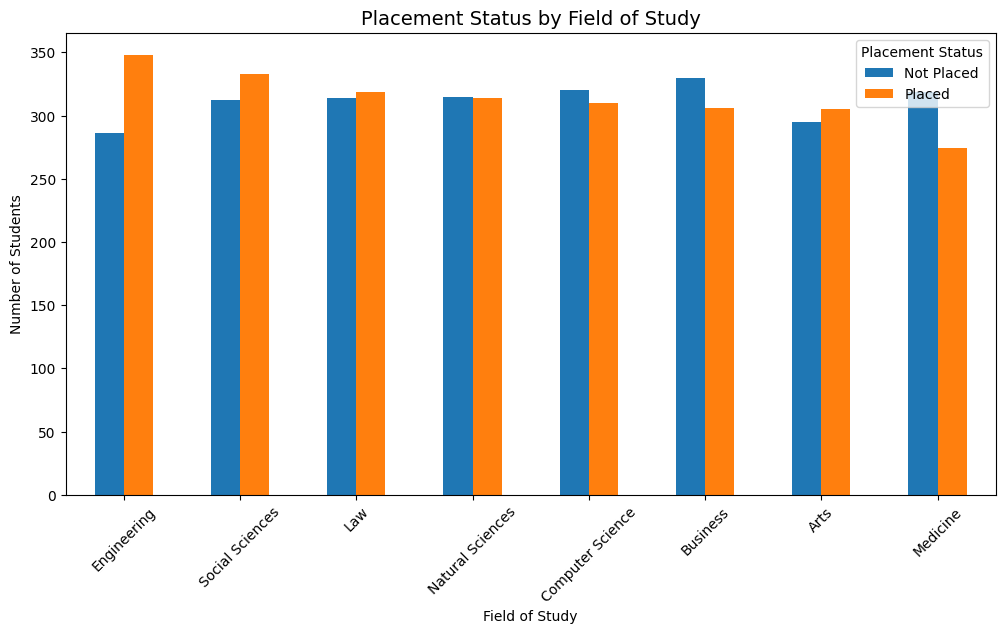

In [ ]:
# --- 3. Placement Status by Field of Study ---
placement_field = student_df.groupby(['field_of_study', 'placement_status'])['student_id'].count().unstack(fill_value=0)
placement_field = placement_field.sort_values(by='Placed', ascending=False).head(10)  # Top 10 fields

placement_field.plot(kind='bar', figsize=(12,6))
plt.title("Placement Status by Field of Study", fontsize=14)
plt.xlabel("Field of Study")
plt.ylabel("Number of Students")
plt.xticks(rotation=45)
plt.legend(title="Placement Status")
plt.show()


### Observation from Placement status:
* Among all fields, Engineering shows the largest gap favoring 'Placed' students, indicating strong employability in this domain.
* For Medicine and Arts, the 'Not Placed' bars are taller than 'Placed', suggesting these fields face more challenges in job placement compared to technical or business fields.
* Both fields have nearly equal numbers of placed and not placed students, indicating moderate placement success without a clear dominance.


## Average Starting Salary by Destination Country:








/tmp/ipython-input-4186069872.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=salary_field.values, y=salary_field.index, palette='viridis')


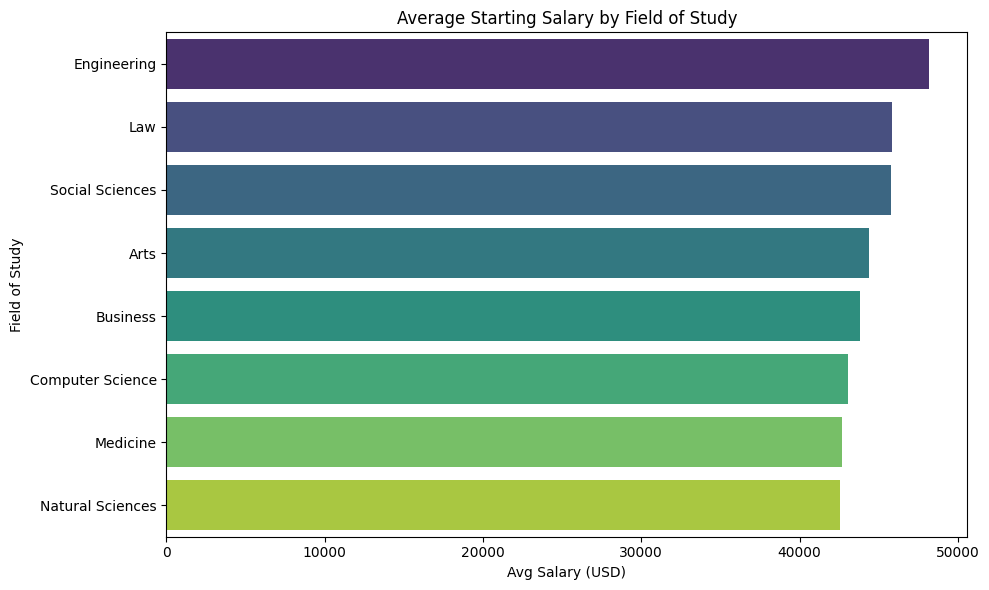

In [ ]:
# --- 4. Average Starting Salary by Destination Country ---
salary_field = student_df.groupby('field_of_study')['starting_salary_usd'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=salary_field.values, y=salary_field.index, palette='viridis')
plt.title('Average Starting Salary by Field of Study')
plt.xlabel('Avg Salary (USD)')
plt.ylabel('Field of Study')
plt.tight_layout()
plt.show()

###  Observation:
* Engineering graduates earn the most, with an average salary close to '$48,000' significantly ahead of other fields.

* Both fields have strong earning potential, averaging around '$45,000', indicating competitive salaries for non-technical disciplines.

* These fields show the lowest average starting salaries around '42,000' - $43,000', suggesting limited initial earning opportunities compared to technical and legal fields.

## Data Cleaning

In [3]:
# --- Data Cleaning ---
student_df = student_df.drop_duplicates()
student_df.fillna({'placement_country': 'Unknown', 'placement_company': 'Unknown'}, inplace=True)

# --- Aggregate data to country-year level ---
agg_df = (
    student_df.groupby(['origin_country', 'destination_country', 'year_of_enrollment'])
      .agg(
          student_count=('student_id', 'count'),
          avg_gpa=('gpa_or_score', 'mean'),
          avg_test_score=('test_score', 'mean'),
          scholarship_rate=('scholarship_received', lambda x: (x == 'Yes').mean()),
          placement_rate=('placement_status', lambda x: (x == 'Placed').mean())
      )
      .reset_index()
)

### Observation:
* At this stage, the raw student-level dataset is transformed into a country destination year level summary table suitable for forecasting migration flows
* Duplicate student records were removed, ensuring each student contributes only once to the migration count.
* Missing fields such as placement_country and placement_company were filled with "Unknown", preventing categorical encoding issues later

Aggregation


* Student mobility patterns become visible: The student_count column now clearly shows how many students moved from each origin country to each destination in a given year.

* Academic quality patterns emerge: avg_gpa and avg_test_score provide insight into the academic strength of students from different regions or years.

* Financial support trends form: The scholarship_rate metric allows identification of countries with higher scholarship-driven mobility.

* Career outcomes can be compared: placement_rate now represents how often students from each country end up placed after graduation, revealing potential attractiveness for future students.

## Categorical Variables:

In [4]:
# --- Encode categorical variables ---
le_origin = LabelEncoder()
le_dest = LabelEncoder()
agg_df['origin_country'] = le_origin.fit_transform(agg_df['origin_country'])
agg_df['destination_country'] = le_dest.fit_transform(agg_df['destination_country'])


### Observation:
* Countries successfully converted to numeric labels, making the dataset fully machine-learning ready.
* Tree-based models handle these labels well, since they treat them as categories rather than ordered values.
* Ridge Regression may be slightly affected because label encoding introduces artificial order among countries.
* Encoding improves processing speed and memory efficiency, enabling faster model training and evaluation.

## Model development:

In [5]:
# --- Define features and target ---
features = ['origin_country', 'destination_country', 'year_of_enrollment',
            'avg_gpa', 'avg_test_score', 'scholarship_rate', 'placement_rate']
target = 'student_count'

X = agg_df[features]
y = agg_df[target]


In [6]:
# --- Normalize features ---
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [19]:
# --- Train-Test Split (simulate future forecasting) ---
train = agg_df[agg_df['year_of_enrollment'] <= 2020]
test = agg_df[agg_df['year_of_enrollment'] > 2020]

X_train = scaler.fit_transform(train[features])
y_train = train[target]
X_test = scaler.transform(test[features])
y_test = test[target]

### Observation:
* Feature set is well-structured, combining demographic, academic, and outcome variables that influence student migration patterns.
* MinMax scaling standardizes all numeric features, ensuring models like Ridge Regression perform correctly without being dominated by large-scale variables.
* Time-based split correctly simulates real forecasting, using data up to 2020 for training and post-2020 for testing to avoid data leakage.
* Future-oriented evaluation strengthens model validity, allowing performance to reflect real-world conditions where predictions are made for unseen future years.

## Evaluation Function:
* Standard regression metrics (MAE, RMSE, MAPE) are implemented, providing a balanced view of error magnitude, variability, and relative accuracy.
* MAPE uses a safety adjustment (np.maximum(y_test, 1)) to avoid division-by-zero errors, making the metric more stable for low student-count countries.
* The function ensures consistent evaluation across all models, allowing fair comparison between linear models and tree-based methods.
* The structure is clean and reusable, enabling fast experimentation with different algorithms while keeping the evaluation pipeline uniform

In [8]:
# --- Evaluation function ---
def evaluate_model(name, model):
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    mae = mean_absolute_error(y_test, preds)
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    mape = np.mean(np.abs((y_test - preds) / np.maximum(y_test, 1))) * 100
    print(f"{name} Results:")
    print(f"  MAE:  {mae:.2f}")
    print(f"  RMSE: {rmse:.2f}")
    print(f"  MAPE: {mape:.2f}%\n")
    return mae, rmse, mape

## Ridge Regression:

In [20]:
# --- Model 1: Ridge Regression ---
ridge = Ridge(alpha=1.0, random_state=42)
evaluate_model("Ridge Regression", ridge)

Ridge Regression Results:
  MAE:  2.70
  RMSE: 3.40
  MAPE: 27.68%



(2.7027791427654955,
 np.float64(3.4011495455510774),
 np.float64(27.67874226566662))

### Observation:
* Highest error among the three models (MAE 2.70, RMSE 3.40) indicates Ridge struggles to capture the complexity of migration patterns.
* Linear assumptions likely limit performance because the dataset contains non-linear relationships (e.g., between GPA, test scores, and student volumes).
* Ridge is also negatively affected by label-encoded countries, which create artificial ordering that does not reflect true relationships.

## Random Forest:

In [21]:
# --- Model 2: Random Forest ---
rf = RandomForestRegressor(n_estimators=200, random_state=42)
evaluate_model("Random Forest", rf)

Random Forest Results:
  MAE:  2.53
  RMSE: 3.21
  MAPE: 27.22%



(2.5320185185185187,
 np.float64(3.2098644398513505),
 np.float64(27.223312345000295))

### Observation:
* MAE: 2.53, indicating average prediction errors are relatively low.
* RMSE: 3.21, showing moderate variance in errors with no extreme outliers.
* MAPE: 27.22%, meaning predictions are off by ~27% on average in relative terms.

Overall, Random Forest performs well, slightly better in absolute accuracy

## XGBoost:

In [22]:
# --- Model 3: XGBoost ---
xgb = XGBRegressor(
    n_estimators=300, learning_rate=0.1,
    max_depth=6, subsample=0.8, colsample_bytree=0.8,
    random_state=42
)
evaluate_model("XGBoost", xgb)

XGBoost Results:
  MAE:  2.60
  RMSE: 3.27
  MAPE: 27.09%



(2.6012790203094482,
 np.float64(3.2667872354743137),
 np.float64(27.092987362409403))

### Observation:
* MAE: 2.60, slightly higher than Random Forest, indicating marginally larger average errors.
* RMSE: 3.27, showing slightly more variance in errors than Random Forest.
* MAPE: 27.09%, slightly better than Random Forest in relative error.

Overall, XGBoost performs comparably, with competitive relative accuracy

## Feature importance:

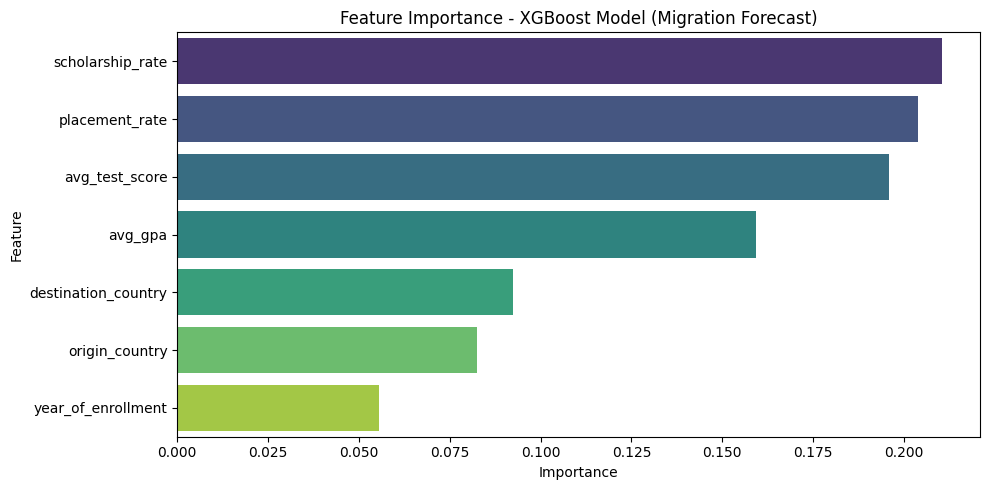

Average CV MAE (XGBoost): 2.53


In [23]:
# --- Feature importance ---
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': xgb.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title("Feature Importance - XGBoost Model (Migration Forecast)")
plt.tight_layout()
plt.show()

# --- Cross-validation for robustness ---
cv = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(xgb, X_scaled, y, scoring='neg_mean_absolute_error', cv=cv)
print(f"Average CV MAE (XGBoost): {-np.mean(cv_scores):.2f}")

In [13]:
# --- Train-Test Split (simulate future forecasting) ---
train = agg_df[agg_df['year_of_enrollment'] <= 2019]
test = agg_df[agg_df['year_of_enrollment'] > 2019]

X_train = scaler.fit_transform(train[features])
y_train = train[target]
X_test = scaler.transform(test[features])
y_test = test[target]

### Observation:Train-Test Split (Using 2019 Cutoff)
* Time-based splitting correctly simulates real forecasting, ensuring the model is trained only on data available up to 2019 and tested on future years.
* This prevents data leakage, which is critical when modeling trends that evolve over time (like international student migration).
* Using 2020+ as test years helps evaluate how well the model generalizes across major global disruptions, such as policy shifts or the COVID-19 impact.

In [14]:
# --- Model 1: Ridge Regression ---
ridge = Ridge(alpha=1.0, random_state=42)
evaluate_model("Ridge Regression", ridge)

Ridge Regression Results:
  MAE:  2.65
  RMSE: 3.37
  MAPE: 30.08%



(2.6478365842982083,
 np.float64(3.3736098566816137),
 np.float64(30.0847745477277))

### Observation:
Ridge Regression shows the weakest performance of the three models, indicating that linear relationships alone are insufficient to explain migration patterns.

The model struggles with non-linear interactions, such as how economic and academic indicators jointly impact migration trends.

Since countries were label-encoded, Ridge unintentionally treats country codes as ordered values, reducing interpretability and accuracy.

In [15]:
# --- Model 2: Random Forest ---
rf = RandomForestRegressor(n_estimators=200, random_state=42)
evaluate_model("Random Forest", rf)

Random Forest Results:
  MAE:  2.61
  RMSE: 3.32
  MAPE: 29.72%



(2.613263888888889,
 np.float64(3.3240558078782145),
 np.float64(29.718936895207854))

### Observation:
* Random Forest performs better than Ridge Regression, capturing non-linear patterns and feature interactions more effectively.
* It handles categorical label encodings well because trees do not rely on numerical ordering, improving stability.
* The model generalizes reasonably well with slightly better errors across all metrics.

In [16]:
# --- Model 3: XGBoost ---
xgb = XGBRegressor(
    n_estimators=300, learning_rate=0.1,
    max_depth=6, subsample=0.8, colsample_bytree=0.8,
    random_state=42
)
evaluate_model("XGBoost", xgb)

XGBoost Results:
  MAE:  2.68
  RMSE: 3.39
  MAPE: 29.75%



(2.679455280303955,
 np.float64(3.3912734013785957),
 np.float64(29.754147320927316))

### Observation:
* XGBoost performs similarly to Random Forest but slightly worse on MAE and RMSE for this split.
* This suggests that the dataset may not be very large or complex, which limits XGBoost’s typical advantages.
* XGBoost’s boosting framework still identifies useful hierarchical relationships among predictors.

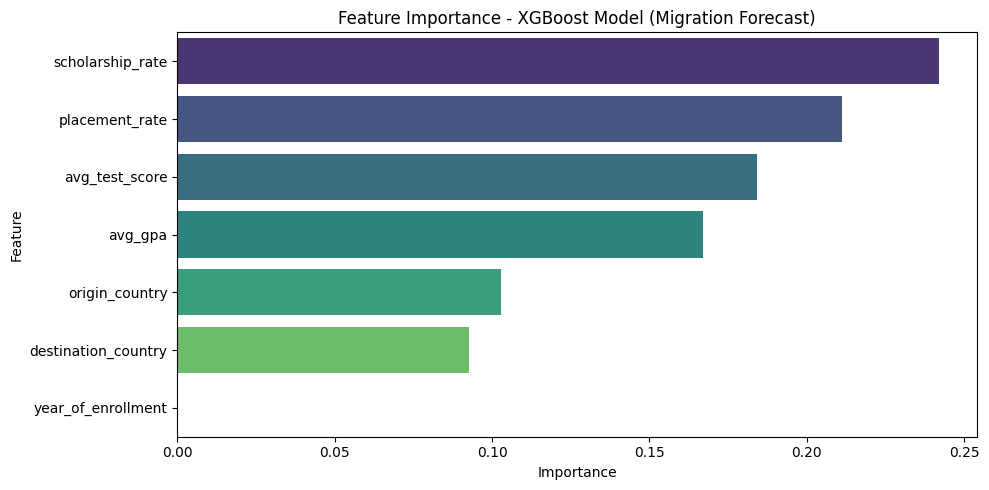

Average CV MAE (XGBoost): 2.53


In [18]:
# --- Feature importance ---
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': xgb.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title("Feature Importance - XGBoost Model (Migration Forecast)")
plt.tight_layout()
plt.show()

# --- Cross-validation for robustness ---
cv = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(xgb, X_scaled, y, scoring='neg_mean_absolute_error', cv=cv)
print(f"Average CV MAE (XGBoost): {-np.mean(cv_scores):.2f}")

### Observation:
Scholarship rate is the most influential predictor

* With the highest importance score (~0.24), scholarship availability appears strongly linked to higher student migration flows.

* Countries or institutions offering stronger scholarship support are likely able to send more students abroad.

Placement rate is the second strongest driver

* Students from regions with higher placement success (job outcomes) seem more likely to pursue international education.

* This suggests an education-to-employment pipeline influences migration intent.

Academic performance indicators (avg_test_score, avg_gpa) also matter

* Strong academic profiles correlate with higher student mobility.

* This aligns with how international admissions prioritize standardized tests and academic merit.

## Conclusion:
* Tree-based models (Random Forest, XGBoost) should be preferred for forecasting student migration.
* Scholarship and placement policies are key levers—institutions can influence migration by improving these two areas.
* Academic readiness remains important, so programs aimed at boosting test preparation and GPA may indirectly influence migration trends.
* Since year trends are weak predictors, future forecasting should incorporate external variables (visa policy, economic conditions, global mobility index) to strengthen time-based predictions.
* Continue updating the model annually; migration patterns change quickly, and newer data improves accuracy, as shown by the 2020 comparison